In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Danish Parliament

In [2]:
df_dk = pd.read_csv("ParlaMint-DK-SENT.csv", delimiter = ",", dtype = object)
df_dk["YearMonth"] = df_dk["Date"].str[:-3]

In [3]:
df_dk["Word_total"] = df_dk["Word_total"].astype(float)

In [4]:
df_dk["Word_total"].astype(float).sum()

40797597.0

In [5]:
df_dk["Word_total"].mean()

102.34965756002107

In [6]:
(df_dk["Word_total"] < 200).sum() / len(df_dk)

0.8735079400918191

In [7]:
len(df_dk)

398610

In [8]:
df_dk.groupby("Speaker_role", dropna=False)["Word_total"].count()/len(df_dk)

Speaker_role
Chairperson    0.521736
Regular        0.478264
Name: Word_total, dtype: float64

In [9]:
df_dk.groupby(["Speaker_MP", "Speaker_Minister", "Speaker_role"])["Word_total"].sum()/df_dk["Word_total"].sum()

Speaker_MP  Speaker_Minister  Speaker_role
MP          -                 Chairperson     0.057003
                              Regular         0.727540
            Minister          Chairperson     0.000067
                              Regular         0.184716
notMP       -                 Chairperson     0.001257
                              Regular         0.024653
            Minister          Regular         0.004764
Name: Word_total, dtype: float64

In [10]:
df_dk.groupby(["Speaker_MP", "Speaker_Minister", "Speaker_role"])["Speaker_name"].nunique()/489

Speaker_MP  Speaker_Minister  Speaker_role
MP          -                 Chairperson     0.051125
                              Regular         0.734151
            Minister          Chairperson     0.002045
                              Regular         0.130879
notMP       -                 Chairperson     0.002045
                              Regular         0.069530
            Minister          Regular         0.012270
Name: Speaker_name, dtype: float64

In [11]:
df_dk["Speaker_name"].nunique()

372

In [12]:
df_dk.groupby(["Speaker_MP", "Speaker_Minister", "Speaker_role"])["Speaker_name"].unique()

Speaker_MP  Speaker_Minister  Speaker_role
MP          -                 Chairperson     [Lykketoft, Mogens, Loklindt, Lone, Clausen, P...
                              Regular         [Haarder, Bertel, Sørensen, Finn, Lind, Annett...
            Minister          Chairperson                                     [Haarder, Bertel]
                              Regular         [Hansen, Carsten, Wammen, Nicolai, Hækkerup, N...
notMP       -                 Chairperson                             [Petersen, Rasmus Helveg]
                              Regular         [Berth, Kenneth Kristensen, Nørris, Sarah, Rii...
            Minister          Regular         [Lidegaard, Martin, Jørgensen, Dan, Christense...
Name: Speaker_name, dtype: object

In [13]:
df_dk.groupby(["Speaker_MP", "Speaker_Minister", "Speaker_role"])["Word_total"].mean()

Speaker_MP  Speaker_Minister  Speaker_role
MP          -                 Chairperson      11.447002
                              Regular         194.874252
            Minister          Chairperson     144.526316
                              Regular         234.421906
notMP       -                 Chairperson      10.708559
                              Regular         191.428245
            Minister          Regular         209.683927
Name: Word_total, dtype: float64

In [14]:
df_dk.groupby(["Speaker_MP", "Speaker_Minister", "Speaker_role"])["Word_total"].count()/len(df_dk)

Speaker_MP  Speaker_Minister  Speaker_role
MP          -                 Chairperson     0.509671
                              Regular         0.382110
            Minister          Chairperson     0.000048
                              Regular         0.080648
notMP       -                 Chairperson     0.012017
                              Regular         0.013181
            Minister          Regular         0.002326
Name: Word_total, dtype: float64

#### Speaker

In [15]:
(df_dk["Speaker_role"]== "Chairperson").sum()/len(df_dk)

0.5217355309701212

In [16]:
pd.unique(df_dk[df_dk["Speaker_role"]== "Chairperson"]["Speaker_name"])

array(['Lykketoft, Mogens', 'Loklindt, Lone', 'Clausen, Per',
       'Kjærsgaard, Pia', 'Haarder, Bertel', 'Lilleholt, Lars Christian',
       'Bøgsted, Bent', 'Paulsen, John Dyrby', 'Klint, Karen J.',
       'Kristensen, Henrik Dam', 'Ellemann, Karen', 'Torp, Trine',
       'Bonnesen, Erling', 'Petersen, Rasmus Helveg', 'Juhl, Christian',
       'Lind, Annette', 'Dahl, Jens Henrik Thulesen', 'Brix, Stine',
       'Thorning-Schmidt, Helle', 'Engelbrecht, Benny',
       'Halsboe-Jørgensen, Ane', 'Bock, Mette',
       'Lorentzen, Kristian Pihl', 'Mikkelsen, Leif', 'Rohde, Jens',
       'Ahrendtsen, Alex'], dtype=object)

In [17]:
speaker_words = df_dk[df_dk["Speaker_role"] == "Chairperson"]["Word_total"].astype(float).sum()
total_words = df_dk["Word_total"].astype(float).sum()

In [18]:
print(speaker_words, total_words, speaker_words/total_words)

2379613.0 40797597.0 0.058327283344653855


In [19]:
#speech length
df_dk[df_dk["Speaker_role"] == "Chairperson"]["Word_total"].astype(float).mean()

11.442152436180391

#### Who lacks party status?

The "sympathizers"/supporting parties -- parties of the same bloc as the coalition but not in it. + Greenland and Faroese parties (remove them) 

In [20]:
df_dk[df_dk["Party_status"].isna()]["Speaker_role"].value_counts()

Chairperson    67834
Regular        46622
Name: Speaker_role, dtype: int64

In [21]:
df_dk[df_dk["Party_status"].isna()]["Speaker_party_name"].value_counts()

Dansk Folkeparti                45341
Socialistisk Folkeparti         23805
Enhedslisten                    17021
Radikale Venstre                12877
Liberal Alliance                 7042
Alternativet                     1777
Det Konservative Folkeparti      1474
Uden for folketingsgrupperne     1315
Inuit Ataqatigiit                1029
Kristendemokraterne               678
Frie Grønne                       639
Javnaðarflokkurin                 399
Siumut                            390
Tjóðveldi                         261
Sambandsflokkurin                 172
Nunatta Qitornai                   97
Name: Speaker_party_name, dtype: int64

In [22]:
df_dk[df_dk["Party_status"].isna()]["Speaker_party"].value_counts()

DF     45341
SF     23805
EL     17021
RV     12877
LA      7042
ALT     1777
KF      1474
UFG     1315
IA      1029
KD       678
FG       639
JF       399
SIU      390
T        261
SP       172
NQ        97
Name: Speaker_party, dtype: int64

In [23]:
print(df_dk[df_dk["Party_status"].isna()].groupby("YearMonth")["Speaker_party"].value_counts().to_string())

YearMonth  Speaker_party
2014-10    EL                327
           SF                127
           IA                 12
           JF                  9
           SP                  8
           SIU                 7
           UFG                 3
2014-11    EL                702
           SF                146
           JF                  1
2014-12    EL                486
           SF                215
           UFG                11
           IA                  6
           JF                  4
           SIU                 3
           SP                  3
2015-01    EL                492
           SF                138
           UFG                21
           SIU                 7
           IA                  6
2015-02    EL                385
           SF                179
           IA                  8
           SIU                 4
           SP                  1
2015-03    EL                596
           SF                148
           UFG    

#### Party status

In [24]:
#remove faroes and greenland 
df_dk = df_dk[~df_dk["Speaker_party"].isin(["IA", "JF", "SIU", "T", "SP", "NQ", "FG"])]

In [25]:
#remove chaiperson
df_dk = df_dk[df_dk["Speaker_role"]!= "Chairperson"]

In [26]:
#remove non-minister non-MPs
df_dk = df_dk.drop(df_dk[(df_dk["Speaker_Minister"] == "-") & (df_dk["Speaker_MP"] == "notMP")].index)

In [27]:
df_dk.groupby("Party_status", dropna = False)["ID"].count()/len(df_dk)

Party_status
Coalition     0.306172
Opposition    0.472855
NaN           0.220973
Name: ID, dtype: float64

In [28]:
df_dk.groupby(["Party_status", "Speaker_Minister"], dropna = False)["Speaker_name"].nunique()/df_dk.groupby(["Party_status", "Speaker_Minister"], dropna = False)["Speaker_name"].nunique().sum()

Party_status  Speaker_Minister
Coalition     -                   0.201413
              Minister            0.121908
Opposition    -                   0.424028
NaN           -                   0.252650
Name: Speaker_name, dtype: float64

In [29]:
df_dk.groupby(["Party_status", "Speaker_Minister"], dropna = False)["Speaker_name"].nunique()/df_dk.groupby(["Party_status", "Speaker_Minister"], dropna = False)["Speaker_name"].nunique().sum()

Party_status  Speaker_Minister
Coalition     -                   0.201413
              Minister            0.121908
Opposition    -                   0.424028
NaN           -                   0.252650
Name: Speaker_name, dtype: float64

In [30]:
df_dk.groupby(["Party_status", "Speaker_Minister"], dropna = False)["Word_total"].sum()/df_dk["Word_total"].sum()

Party_status  Speaker_Minister
Coalition     -                   0.117193
              Minister            0.209796
Opposition    -                   0.463256
NaN           -                   0.209754
Name: Word_total, dtype: float64

In [31]:
df_dk.groupby(["Party_status", "Speaker_Minister"], dropna = False)["Word_total"].count()/len(df_dk)

Party_status  Speaker_Minister
Coalition     -                   0.125144
              Minister            0.181028
Opposition    -                   0.472855
NaN           -                   0.220973
Name: Word_total, dtype: float64

In [32]:
df_dk.groupby(["Party_status", "Speaker_Minister"], dropna = False)["Word_total"].mean()

Party_status  Speaker_Minister
Coalition     -                   188.865684
              Minister            233.728548
Opposition    -                   197.585339
NaN           -                   191.440057
Name: Word_total, dtype: float64

In [33]:
df_dk.groupby(["Party_status"], dropna = False)["Word_total"].mean()

Party_status
Coalition     215.391380
Opposition    197.585339
NaN           191.440057
Name: Word_total, dtype: float64

In [34]:
df_dk.groupby("Party_status", dropna = False)["Word_total"].sum()/df_dk["Word_total"].sum()

Party_status
Coalition     0.326989
Opposition    0.463256
NaN           0.209754
Name: Word_total, dtype: float64

In [35]:
df_dk.groupby(["Party_status", "Speaker_Minister"], dropna = False)["Word_total"].mean()

Party_status  Speaker_Minister
Coalition     -                   188.865684
              Minister            233.728548
Opposition    -                   197.585339
NaN           -                   191.440057
Name: Word_total, dtype: float64

In [36]:
proportions = df_dk.groupby(["Government", "Party_status"], dropna = False)["Word_total"].sum()/df_dk.groupby(["Government"], dropna = False)["Word_total"].sum()

In [37]:
print(proportions)

Government           Party_status
Frederiksen I        Coalition       0.313505
                     Opposition      0.429203
                     NaN             0.257292
Rasmussen II         Coalition       0.261249
                     Opposition      0.509055
                     NaN             0.229696
Rasmussen III        Coalition       0.363171
                     Opposition      0.499298
                     NaN             0.137531
Thorning-Schmidt II  Coalition       0.371901
                     Opposition      0.407612
                     NaN             0.220488
Name: Word_total, dtype: float64


### By meeting type

In [38]:
matches = ["behandling", "Spm.|Spørgetime|spørgetime", "forhandling|Forhandling", "afstemning", 
          "partilederdebat|Partilederdebat", "hasteforespørgsel"]

In [39]:
percent = []
words = []

for match in matches:
    percent.append(df_dk["Topic_title"].str.contains(match).value_counts().loc[True]/len(df_dk))
    words.append(df_dk[df_dk["Topic_title"].str.contains(match)]["Word_total"].sum()/df_dk["Word_total"].sum())

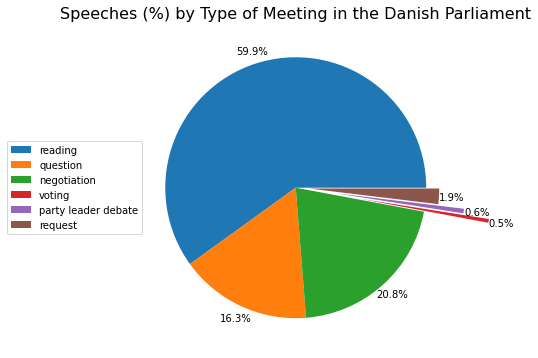

In [40]:
plt.rcParams["figure.figsize"] = (8,6)

explode = (0, 0, 0 ,0.5, 0.3, 0.1)
patches, tags, pers = plt.pie(percent, labels=None, explode = explode, autopct='%1.1f%%', pctdistance=1.1)
plt.title('Speeches (%) by Type of Meeting in the Danish Parliament', size = 16)
labels = ["reading", "question", "negotiation", "voting", "party leader debate", "request"]

    
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.4, 0.5),
           fontsize=10)
plt.show()

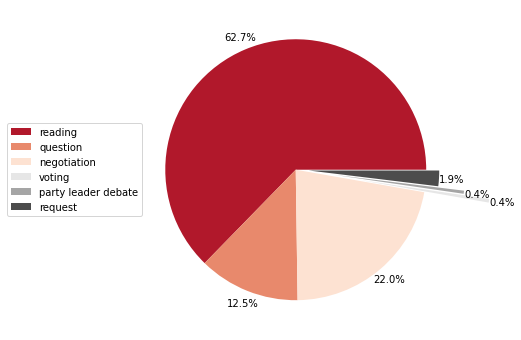

In [59]:
plt.rcParams["figure.figsize"] = (8,6)

labels = ["reading", "question", "negotiation", "voting", "party leader debate", "request"]
colors = plt.get_cmap("RdGy")(np.linspace(0.1, 0.9, len(labels)))
explode = (0, 0, 0 ,0.5, 0.3, 0.1)
patches, tags, pers = plt.pie(words, labels=None, explode = explode, autopct='%1.1f%%', pctdistance=1.1, colors = colors)
titlefont = {"fontname": "Times"}
#plt.title('Words (%) by Type of Meeting in the Danish Parliament', size = 16, **titlefont)

    
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.4, 0.5),
           fontsize=10)
plt.show()

In [42]:
resten = df_dk[~df_dk["Topic_title"].str.contains("behandling|Spm.|Spørgetime|forhandling|Punkt 0|afstemning|spørgetime|Forhandling")]["Topic_title"]

In [43]:
resten.to_string()

'3356      Redegørelse givet af R 1: Om statsministerens ...\n19843                              Udvidet partilederdebat.\n19845                              Udvidet partilederdebat.\n19847                              Udvidet partilederdebat.\n19849                              Udvidet partilederdebat.\n19851                              Udvidet partilederdebat.\n19853                              Udvidet partilederdebat.\n19855                              Udvidet partilederdebat.\n19857                              Udvidet partilederdebat.\n19859                              Udvidet partilederdebat.\n19861                              Udvidet partilederdebat.\n19863                              Udvidet partilederdebat.\n19865                              Udvidet partilederdebat.\n19867                              Udvidet partilederdebat.\n19869                              Udvidet partilederdebat.\n19871                              Udvidet partilederdebat.\n19873                  

In [44]:
df_dk["Topic_title"].str.contains("behandling").value_counts()/len(df_dk)

True     0.617906
False    0.382094
Name: Topic_title, dtype: float64

In [45]:
df_dk["Meeting_type"] = pd.Series(dtype='str')

In [46]:
reading = df_dk["Topic_title"].str.contains("behandling")
negotiation = df_dk["Topic_title"].str.contains("forhandling|Forhandling")
question = df_dk["Topic_title"].str.contains("Spm.|spørgetime|Spørgetime")

In [47]:
df_dk["Meeting_type"] = df_dk["Meeting_type"].mask(reading, other = "reading")
df_dk["Meeting_type"] = df_dk["Meeting_type"].mask(negotiation, other = "negotiation")
df_dk["Meeting_type"] = df_dk["Meeting_type"].mask(question, other = "question")

In [48]:
df_dk.groupby(["Meeting_type", "Party_status"], dropna = False)["Word_total"].sum()/df_dk.groupby(["Meeting_type"])["Word_total"].sum()

Meeting_type  Party_status
negotiation   Coalition       0.308878
              Opposition      0.451602
              NaN             0.239520
question      Coalition       0.558880
              Opposition      0.345253
              NaN             0.095866
reading       Coalition       0.286038
              Opposition      0.491639
              NaN             0.222323
NaN           Coalition            NaN
              Opposition           NaN
              NaN                  NaN
Name: Word_total, dtype: float64

In [49]:
df_dk.groupby(["Meeting_type", "Party_status"], dropna = False)["Word_total"].count()/df_dk.groupby(["Meeting_type"])["Word_total"].count()

Meeting_type  Party_status
negotiation   Coalition       0.263343
              Opposition      0.468780
              NaN             0.267878
question      Coalition       0.507112
              Opposition      0.386909
              NaN             0.105979
reading       Coalition       0.266997
              Opposition      0.497358
              NaN             0.235645
NaN           Coalition            NaN
              Opposition           NaN
              NaN                  NaN
Name: Word_total, dtype: float64

In [157]:
df_dk.groupby(["Meeting_type", "Party_status"], dropna = False)["Word_total"].mean()

Meeting_type  Party_status
negotiation   Coalition       250.396089
              Opposition      205.659707
              NaN             190.882927
question      Coalition       170.400000
              Opposition      137.969799
              NaN             139.862101
reading       Coalition       225.769512
              Opposition      208.316840
              NaN             198.826746
NaN           Coalition       335.252830
              Opposition      145.125561
              NaN             132.043228
Name: Word_total, dtype: float64

In [ ]:
df_dk[df_dk["Topic_title"].str.contains("behandling")]

In [220]:
df_dk["Topic_title"].str.contains("behandling|Spm.|forhandling|Punkt 0|afstemning|spørgetime").value_counts().loc[True]

143674

In [198]:
df_dk["Topic_title"].str.contains("afstemning").value_counts()/len(df_dk)

False    0.995238
True     0.004762
Name: Topic_title, dtype: float64

In [207]:
df_dk["Topic_title"].str.contains("forhandling|Forhandling").value_counts()/len(df_dk)

False    0.785666
True     0.214334
Name: Topic_title, dtype: float64

In [209]:
df_dk["Topic_title"].str.contains("Spm.|spørgetime|Spørgetime").value_counts()/len(df_dk)

False    0.83184
True     0.16816
Name: Topic_title, dtype: float64

In [199]:
df_dk["Topic_title"].str.contains("Punkt 0").value_counts()/len(df_dk)

False    0.999858
True     0.000142
Name: Topic_title, dtype: float64

In [ ]:
df_dk["Topic_title"].str.contains("behandling").value_counts()

In [187]:
df_dk.groupby(["Question"], dropna = False)["Word_total"].count()/len(df_dk)

Question
False    0.382094
True     0.617906
Name: Word_total, dtype: float64

In [190]:
df_dk.groupby(["Debate"], dropna = False)["Word_total"].sum()/df_dk["Word_total"].sum()

Debate
False    0.871908
True     0.128092
Name: Word_total, dtype: float64

In [155]:
df_dk.groupby(["Debate", "Party_status"], dropna = False)["Word_total"].sum()/df_dk.groupby(["Debate"], dropna = False)["Word_total"].sum()

Debate  Party_status
False   Coalition       0.293340
        Opposition      0.480265
        NaN             0.226395
True    Coalition       0.556034
        Opposition      0.347481
        NaN             0.096485
Name: Word_total, dtype: float64

In [156]:
df_dk.groupby(["Debate", "Party_status"], dropna = False)["Word_total"].count()/df_dk.groupby(["Debate"], dropna = False)["Word_total"].count()

Debate  Party_status
False   Coalition       0.265769
        Opposition      0.490084
        NaN             0.244147
True    Coalition       0.506389
        Opposition      0.387476
        NaN             0.106135
Name: Word_total, dtype: float64

In [157]:
df_dk.groupby(["Question", "Party_status"], dropna = False)["Word_total"].sum()/df_dk.groupby(["Question"], dropna = False)["Word_total"].sum()

Question  Party_status
False     Coalition       0.400607
          Opposition      0.412312
          NaN             0.187081
True      Coalition       0.286547
          Opposition      0.491243
          NaN             0.222210
Name: Word_total, dtype: float64

In [158]:
df_dk.groupby(["Question", "Party_status"], dropna = False)["Word_total"].count()/df_dk.groupby(["Question"], dropna = False)["Word_total"].count()

Question  Party_status
False     Coalition       0.368720
          Opposition      0.434041
          NaN             0.197238
True      Coalition       0.267495
          Opposition      0.496855
          NaN             0.235650
Name: Word_total, dtype: float64

In [159]:
elsewhere = df_dk[(df_dk["Debate"] == "False") & (df_dk["Question"] == "False")]

In [160]:
elsewhere.groupby(["Party_status"], dropna = False)["Word_total"].sum()/elsewhere["Word_total"].sum()

Party_status
Coalition     0.314134
Opposition    0.448239
NaN           0.237627
Name: Word_total, dtype: float64

In [161]:
elsewhere.groupby(["Party_status"], dropna = False)["Word_total"].count()/elsewhere["Word_total"].count()

Party_status
Coalition     0.262579
Opposition    0.469568
NaN           0.267854
Name: Word_total, dtype: float64

### Gender

In [97]:
regulars = df_dk[df_dk["Speaker_Minister"] == "-"]

In [98]:
regulars.groupby(["Speaker_gender"], dropna = False)["Word_total"].sum()/regulars["Word_total"].sum()

Speaker_gender
F    0.336048
M    0.663952
Name: Word_total, dtype: float64

In [99]:
regulars.groupby(["Speaker_gender"], dropna = False)["Speaker_name"].nunique()/regulars["Speaker_name"].nunique()

Speaker_gender
F    0.404624
M    0.595376
Name: Speaker_name, dtype: float64

In [104]:
regulars.groupby(["Bloc", "Speaker_gender"], dropna = False)["Word_total"].sum()/regulars.groupby(["Bloc"], dropna = False)["Word_total"].sum()

Bloc   Speaker_gender
Left   F                 0.373421
       M                 0.626579
Right  F                 0.295183
       M                 0.704817
NaN    F                 0.251162
       M                 0.748838
Name: Word_total, dtype: float64

In [116]:
regulars.groupby(["Bloc", "Speaker_gender"], dropna = False)["ID"].nunique()/regulars.groupby(["Bloc"], dropna=False)["ID"].nunique()

Bloc   Speaker_gender
Left   F                 0.370573
       M                 0.629427
Right  F                 0.302530
       M                 0.697470
NaN    F                 0.255394
       M                 0.744606
Name: ID, dtype: float64

In [110]:
regulars.columns

Index(['Unnamed: 0', 'ID', 'Sentiment', 'Word_total', 'Score', 'Title', 'Date',
       'Body', 'Term', 'Session', 'Meeting', 'Sitting', 'Agenda', 'Subcorpus',
       'Speaker_role', 'Speaker_MP', 'Speaker_Minister', 'Speaker_party',
       'Speaker_party_name', 'Party_status', 'Speaker_name', 'Speaker_gender',
       'Speaker_birth', 'Topic_title', 'Question', 'Debate', 'YearMonth',
       'Government', 'Bloc'],
      dtype='object')

In [101]:
regulars.groupby(["Bloc", "Speaker_gender"], dropna = False)["Word_total"].mean()

Bloc   Speaker_gender
Left   F                 202.045990
       M                 199.598345
Right  F                 184.252299
       M                 190.827628
NaN    F                 168.536346
       M                 172.350404
Name: Word_total, dtype: float64

In [103]:
df_dk.groupby(["Bloc", "Speaker_gender", "Speaker_Minister"], dropna = False)["Word_total"].mean()

Bloc   Speaker_gender  Speaker_Minister
Left   F               -                   202.045990
                       Minister            249.036470
       M               -                   199.598345
                       Minister            231.876119
Right  F               -                   184.252299
                       Minister            229.185966
       M               -                   190.827628
                       Minister            229.487693
NaN    F               -                   168.536346
       M               -                   172.350404
Name: Word_total, dtype: float64

In [63]:
df_dk.groupby(["Bloc", "Speaker_gender"], dropna = False)["Speaker_name"].nunique()/df_dk.groupby(["Bloc"], dropna = False)["Speaker_name"].nunique()

Bloc   Speaker_gender
Left   F                 0.435897
       M                 0.564103
Right  F                 0.351852
       M                 0.648148
NaN    F                 0.363636
       M                 0.636364
Name: Speaker_name, dtype: float64

In [62]:
df_dk[df_dk["Bloc"].isna()]["Speaker_party_name"].unique()

array(['Sambandsflokkurin', 'Inuit Ataqatigiit', 'Javnaðarflokkurin',
       'Uden for folketingsgrupperne', 'Siumut', 'Kristendemokraterne',
       'Frie Grønne', 'Tjóðveldi', nan, 'Nunatta Qitornai'], dtype=object)

In [55]:
df_dk.groupby(["Government", "Speaker_gender"], dropna = False)["Word_total"].sum()/df_dk.groupby(["Government"], dropna = False)["Word_total"].sum()

Government           Speaker_gender
Frederiksen I        F                 0.367755
                     M                 0.632245
Rasmussen II         F                 0.323412
                     M                 0.676588
Rasmussen III        F                 0.336338
                     M                 0.663662
Thorning-Schmidt II  F                 0.332749
                     M                 0.667251
Name: Word_total, dtype: float64

    2011	179	70	39.1
    2015	179	67	37,4
    2019	179	70	39,1
    2022	179	78	43,6

In [164]:
#speech length
df_dk.groupby(["Speaker_gender"], dropna = False)["Word_total"].mean()

Speaker_gender
F    202.042029
M    201.498039
Name: Word_total, dtype: float64

### Gender and meeting type

In [160]:
df_dk.groupby(["Meeting_type", "Speaker_gender"], dropna = False)["Word_total"].sum()/df_dk.groupby(["Meeting_type"], dropna = False)["Word_total"].sum()

Meeting_type  Speaker_gender
negotiation   F                 0.329717
              M                 0.670283
question      F                 0.347001
              M                 0.652999
reading       F                 0.331453
              M                 0.668547
NaN           F                 0.395094
              M                 0.604906
Name: Word_total, dtype: float64

In [165]:
#by meeting type
df_dk.groupby(["Debate", "Speaker_gender"], dropna = False)["Word_total"].sum()/df_dk.groupby(["Debate"], dropna = False)["Word_total"].sum()

Debate  Speaker_gender
False   F                 0.331676
        M                 0.668324
True    F                 0.345647
        M                 0.654353
Name: Word_total, dtype: float64

In [166]:
df_dk.groupby(["Question", "Speaker_gender"], dropna = False)["Word_total"].sum()/df_dk.groupby(["Question"], dropna = False)["Word_total"].sum()

Question  Speaker_gender
False     F                 0.336830
          M                 0.663170
True      F                 0.331617
          M                 0.668383
Name: Word_total, dtype: float64

In [167]:
elsewhere.groupby(["Speaker_gender"], dropna = False)["Word_total"].count()/elsewhere["Word_total"].count()

Speaker_gender
F    0.338583
M    0.661417
Name: Word_total, dtype: float64

### Gender and bloc

In [168]:
df_dk.groupby(["Bloc", "Speaker_gender"], dropna = False)["Word_total"].sum()/df_dk.groupby(["Bloc"], dropna = False)["Word_total"].sum()

Bloc   Speaker_gender
Left   F                 0.367875
       M                 0.632125
Right  F                 0.295372
       M                 0.704628
NaN    F                 0.251162
       M                 0.748838
Name: Word_total, dtype: float64

In [173]:
df_dk["Bloc"].value_counts(dropna = False)

Left     94350
Right    86358
NaN       1993
Name: Bloc, dtype: int64

### Role

In [99]:
df_dk.columns

Index(['Unnamed: 0', 'ID', 'Sentiment', 'Word_total', 'Score', 'Title', 'Date',
       'Body', 'Term', 'Session', 'Meeting', 'Sitting', 'Agenda', 'Subcorpus',
       'Speaker_role', 'Speaker_MP', 'Speaker_Minister', 'Speaker_party',
       'Speaker_party_name', 'Party_status', 'Speaker_name', 'Speaker_gender',
       'Speaker_birth', 'Topic_title', 'Question', 'Debate', 'YearMonth',
       'Government', 'Bloc'],
      dtype='object')

In [100]:
pd.unique(df_dk["Speaker_Minister"])

array(['-', 'Minister'], dtype=object)

In [101]:
df_dk.groupby(["Speaker_Minister"], dropna = False)["Word_total"].sum()/df_dk["Word_total"].sum()

Speaker_Minister
-           0.790204
Minister    0.209796
Name: Word_total, dtype: float64

In [102]:
df_dk.groupby(["Speaker_Minister"], dropna = False)["ID"].count()/len(df_dk)

Speaker_Minister
-           0.818972
Minister    0.181028
Name: ID, dtype: float64

In [103]:
df_dk.groupby(["Speaker_Minister"], dropna = False)["Word_total"].mean()

Speaker_Minister
-           194.594812
Minister    233.728548
Name: Word_total, dtype: float64